In [9]:
import pandas as pd
import sklearn
import csv

In [11]:
with open('checkins.dat') as input_file:        
    newLines = []
    for line in input_file:
        newLine = [x.strip() for x in line.split('|')]
        if len(newLine) == 6 and newLine[3] and newLine[4]:
            newLines.append(newLine)
with open('checkins.csv', 'w') as output_file:
    file_writer = csv.writer(output_file)
    file_writer.writerows(newLines)

In [127]:
data=pd.read_csv('checkins.csv', header=0)

In [128]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
396629,955561,626076,20073,40.850100,-73.866246,2012-04-13 09:56:48
396630,955892,674797,2297,33.748995,-84.387982,2012-04-13 10:56:03
396631,956377,845102,11195,42.765366,-71.467566,2012-04-13 12:08:45
396632,956119,1139114,29488,42.439479,-83.743830,2012-04-13 11:36:44


In [129]:
X = data.values[0:100000, 3:5]
X

array([[38.895111799999995, -77.0363658],
       [33.800745, -84.41051999999999],
       [45.5234515, -122.6762071],
       ...,
       [29.762884399999997, -95.3830615],
       [32.802955, -96.76992299999999],
       [37.7749295, -122.4194155]], dtype=object)

In [24]:
from sklearn.cluster import MeanShift

In [25]:
MS=MeanShift(bandwidth=0.1)

In [130]:
MS.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [65]:
import numpy as np

In [133]:
labels = MS.labels_
cluster_centers = MS.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

3231

In [163]:
from collections import Counter
q=Counter(labels).values()
a={}
for i,j in enumerate(q):
    a[i]=j
l=len(a)
l   
for k in range(l):
    if a[k] <= 15:
        a.pop(k)
len(a)

592

In [164]:
clusters_select = np.ndarray(shape=(len(a),2))

In [171]:
for i,j in enumerate(a):
    clusters_select[i]=cluster_centers[j]   

In [166]:
len(clusters_select)

592

In [167]:
offices = np.ndarray(shape=(6,2))
offices[0] = np.array([33.751277, -118.188740])
offices[1] = np.array([25.867736, -80.324116])
offices[2] = np.array([51.503016, -0.075479])
offices[3] = np.array([52.378894, 4.885084])
offices[4] = np.array([39.366487, 117.036146])
offices[5] = np.array([-33.868457, 151.205134])

In [168]:
offices

array([[ 3.37512770e+01, -1.18188740e+02],
       [ 2.58677360e+01, -8.03241160e+01],
       [ 5.15030160e+01, -7.54790000e-02],
       [ 5.23788940e+01,  4.88508400e+00],
       [ 3.93664870e+01,  1.17036146e+02],
       [-3.38684570e+01,  1.51205134e+02]])

In [172]:
clusters_select

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [  50.7194116 ,   -1.9811296 ],
       [  42.8386425 ,  -84.1783003 ],
       [  42.7214501 ,  -78.132788  ]])

In [173]:
from matplotlib import pyplot as plt
%matplotlib inline

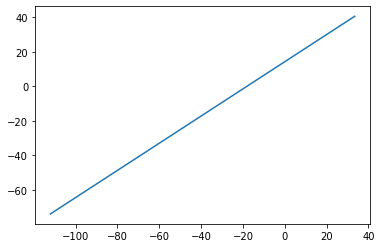

In [180]:
plt.plot(clusters_select[1], clusters_select[0])

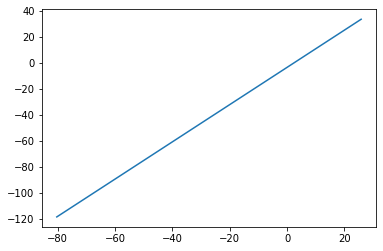

In [182]:
plt.plot(offices[1], offices[0])

In [195]:
arr=[]
c=0
for i in range(len(offices)):
    print(i, "офис(", offices[i], ")")
    for k in range(len(clusters_select)):
        c=((clusters_select[k][0]-offices[i][0])**2+(clusters_select[k][1]-offices[i][1])**2)**0.5
        arr.append(c)
        print("кластер ",clusters_select[k]," :", c)

0 офис( [  33.751277 -118.18874 ] )
кластер  [ 40.7177164  -73.99183542]  : 44.74257091784804
кластер  [  33.44943805 -112.00213969]  : 6.193959165601315
кластер  [  33.44638027 -111.90188756]  : 6.294241462747163
кластер  [ 41.87824378 -87.62984336]  : 31.621096640593514
кластер  [  37.68868157 -122.40933037]  : 5.77204797983301
кластер  [ 38.88616522 -77.04878333]  : 41.45917403585171
кластер  [  33.35734456 -111.82265411]  : 6.378262487136821
кластер  [ 33.76663623 -84.39328918]  : 33.795454305386926
кластер  [ 42.36321864 -71.07368761]  : 47.8956542982241
кластер  [  47.60624472 -122.33204383]  : 14.461227370022126
кластер  [  36.11722914 -115.17107342]  : 3.834584868539052
кластер  [  34.06039755 -118.24870903]  : 0.3148837903362732
кластер  [ 44.97794782 -93.26730089]  : 27.333427616343165
кластер  [ 30.26718362 -97.74311928]  : 20.740354704616063
кластер  [ 40.76687624 -73.83335349]  : 44.90678061393692
кластер  [  39.73583015 -104.98658043]  : 14.495236935243689
кластер  [ 39.9

In [186]:
offices

array([[ 3.37512770e+01, -1.18188740e+02],
       [ 2.58677360e+01, -8.03241160e+01],
       [ 5.15030160e+01, -7.54790000e-02],
       [ 5.23788940e+01,  4.88508400e+00],
       [ 3.93664870e+01,  1.17036146e+02],
       [-3.38684570e+01,  1.51205134e+02]])

In [194]:
clusters_select[1][0]

33.44943805020126

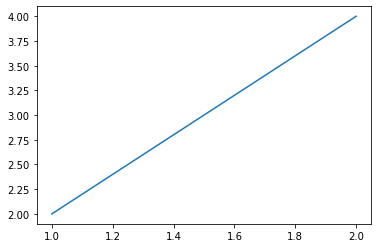

In [187]:
x=[1,2]
y=[2,4]
plt.plot(x,y)

In [189]:
c=((x[0]-y[0])**2+(x[1]-y[1])**2)**0.5

In [190]:
5**0.5

2.23606797749979

In [205]:
arr.index(min(arr))

3230

In [206]:
len(arr)

3552

In [207]:
592*5

2960

In [208]:
min(arr)

0.007834758163107856